# **Deep Learning**

The term **deep learning** refers to a subset of machine learning techniques that utilize artificial **neural networks** with multiple layers — hence "deep" — to model and understand complex patterns in data.

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/ai-ml-dl.svg?raw=1" height="300" />
    <p><em>Deep learning (DL) is a subset of machine learning (ML), which is a subset of artificial intelligence (AI).</em></p>
</div>

Just as classic machine learning, deep learning algorithms can be classified into three main categories:
- **Supervised learning**: the model is trained on a labeled dataset, meaning that each input data point is paired with the correct output. The model learns to map inputs to outputs by minimizing the error between its predictions and the actual labels. Common applications include image classification, speech recognition, and natural language processing.
- **Unsupervised learning**: it involves training models on unlabeled data. The goal is to discover hidden patterns or structures within the data without predefined labels. Techniques such as autoencoders and generative adversarial networks (GANs) are often used for tasks like clustering, dimensionality reduction, and data generation.
- **Reinforcement learning**: models learn to make decisions by interacting with an environment. The model, often referred to as an agent, receives feedback in the form of rewards or penalties based on its actions. Deep reinforcement learning has been successfully applied in areas such as game playing (e.g., AlphaGo), robotics, and autonomous systems.

In particular, we'll motivate deep learning from an **image classification** perspective, which is a classic supervised learning task where the goal is to assign a label to an input image based on its content.

## **Handwriting Recognition**

Suppose we've been tasked with building a function that takes a $28 \times 28 $ grayscale image of a handwritten digit ($0-9$) as input and outputs the corresponding digit label.

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/handwritten-digits.png?raw=1" height="300" />
    <p><em>Handwritten digits</em></p>
</div>

Let $x \in \mathbb{R}^{28 \times 28}$ be the input image, and $y \in \mathbb{Z}_{10}$ be the output label, where $\mathbb{Z}_{10} = \{0, 1, \ldots, 9\}$. Then, we want to write a function $f$ such that:

$$
f(x) = y.
$$

Similarly, from a programming perspective, we want to implement a function that takes an array as input and returns an integer as output:

```python
def f(x: np.ndarray) -> int:
    digit = ...
    return digit
```

As human programmers, we can easily recognize handwritten digits by looking at the images. However, developing an algorithm that can accurately perform this task is no trivial endeavor.

Without loss of generality, we consider the universe of all functions $f$ that can map grayscale images to digits, this is, matrices to scalars:

$$
f: \mathbb{R}^{28 \times 28} \to \mathbb{Z}_{10},
$$

so that the function $f^\ast$ that we are looking for — this is, the one that correctly maps images to the digits they display — is guaranteed to belong to this set.

In order to make searching for $f^\ast$ tractable, we reframe our problem as a **deep supervised learning** task.

## **Neural Networks**

Since the space of all functions that map images to digits is uncountably infinite, the **deep supervised learning** paradigm reduces the search space of all possible functions $f: \mathbb{R}^{28 \times 28} \to \mathbb{Z}_{10}$ to a smaller subset of this space specified by a given **neural network** architecture. Then, $f$ defines the family of functions parameterized by a set of weights $\theta$, according to the chosen architecture:

$$
f(x; \theta) = y.
$$

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/nn.png?raw=1" height="300" />
    <p><em>Feedforward Neural Network (FNN)</em></p>
</div>

Now that our neural net depends both on the input $x$ and the parameters $\theta$, we need to find a way of finding the parameters $\theta^\ast$ such that $f(x; \theta^\ast)$ approximates $f^\ast(x)$ as closely as possible for all possible inputs $x$, this is, all possible $28 \times 28$ images of handwritten digits.

**Universal Approximation Theorem**

### **Dataset**

First, since optimizing $\theta$ over all possible inputs is infeasible, we  rely on a finite **dataset** of $N$ labeled examples:

$$
\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N,
$$

where each $x_i$ is a $28 \times 28$ grayscale image of a handwritten digit, and $y_i$ is the corresponding label.

For our **handwriting recognition** task, we use the public [**MNIST dataset**](http://yann.lecun.com/exdb/mnist/).

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/mnist-dataset.png?raw=1" height="300" />
    <p><em>MNIST dataset samples</em></p>
</div>

### **Loss Function**

Second, we need to define a measure of how well our function $f(x; \theta)$ approximates the true function $f^\ast(x)$ within our dataset $\mathcal{D}$. For that,
we use a **loss function** that quantifies the difference between the predicted output $f(x; \theta)$ and the true label $y$:

$$
\mathcal{L}(f(x; \theta), y).
$$

Since we model our handwriting recognition task as a **regression** problem — we want to predict a continuous output (the digit label) which we round to the nearest integer — we use the **mean squared error (MSE)** loss function:

$$
\mathcal{L}(f(x; \theta), y) = [f(x; \theta) - y]^2.
$$

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/loss.png?raw=1" height="300" />
    <p><em>Loss function illustration</em></p>
</div>

## **Optimization**

Having defined our dataset $\mathcal{D}$ and loss function $\mathcal{L}$, we can now formulate the optimization problem that will allow us to find the optimal parameters $\theta^\ast$ for our neural network:

\begin{align*}
\theta^\ast &= \arg \min_\theta \frac{1}{N} \sum_{i=1}^N \mathcal{L}(f(x_i; \theta), y_i),\\
&= \arg \min_\theta g(\theta).
\end{align*}

Therefore, given a fixed **network architecture** and **dataset**, our goal is to optimize the parameters $\theta$ so that the **loss function** is minimized.

### **Differentiation**

Then, finding the **neural network** $f(x; \theta^\ast)$ that best approximates the true function $f^\ast(x)$ is equivalent to minimizing $g(\theta)$ which, in mathematical terms, can be achieved by taking its **gradient** with respect to the parameters $\theta$ and setting it to zero:

$$
\nabla_\theta g(\theta) = 0.
$$

However, since neural networks are **non-linear** functions with potentially millions of parameters, solving this system of equations analytically is infeasible. We must therefore resort to **numerical optimization** techniques to find an approximate solution.

#### **Gradient Descent**

One of the most common numerical optimization techniques used in deep learning is **gradient descent**. This iterative algorithm updates the parameters $\theta$ in the direction of the negative gradient of the loss function, scaled by a learning rate $\alpha$:

$$
\theta_{t+1} = \theta_t - \alpha \nabla_\theta g(\theta_t).
$$

Hence, we now need an algorithm to efficiently compute the gradient of the loss function with respect to the parameters of the neural network at each iteration $t$.

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/gradient-descent.png?raw=1" height="300" />
    <p><em>Gradient descent</em></p>
</div>

#### **Backpropagation**

First, we need to understand why **symbolic** or **numerical differentation** methods are not suitable for computing the gradient of the loss function in deep learning:
- **Symbolic differentiation**: while it can provide exact gradients, it is impractical for deep neural networks because expressions become extremely large and complex, making symbolic manipulation inefficient and memory-intensive.
- **Numerical differentiation**: although it is straightforward to implement, it suffers from numerical instability, it is computationally expensive and can introduce significant approximation errors, especially in high-dimensional parameter spaces.

Instead, if we leverage the fact that neural networks are composed of a sequence of **layers**, which are differentiable operations, we can use the **backpropagation** algorithm to efficiently compute the gradient of the loss function with respect to the network parameters.

**Automatic differentiation** constructs a **computational graph** that allows computing exact gradients efficiently by systematically applying the **chain rule** of calculus to the operations performed in the neural network.

<div align="center">
    <img src="https://github.com/segusantos/deep-learning-notebook/blob/master/assets/computational-graph.png?raw=1" height="300" />
    <p><em>Computational graph</em></p>
</div>

In particular, given that **neural nets** are compositions of elementary functions such as sums, products and non-linear activations, we can define the **forward** and **backward** passes of these operations and let the **backpropagation** algorithm compute the gradients automatically by composing the local gradients using the **chain rule** for any arbitrary neural network architecture.

In order to illustrate this point, in what follows we manually implement a simple **autodiff engine** with no dependencies and train a simple neural network for the **handwriting recognition** task. In this [notebook's GitHub repo](https://github.com/segusantos/deep-learning-notebook) you can find a more complete implementation with additional primitives and tests that validate its correctness against [PyTorch](https://pytorch.org/).

## **Autodiff Engine**

For simplicity, instead of defining a `Tensor` class as in PyTorch, we define a `Scalar` class that represents a scalar value and its gradient. This class will support basic arithmetic operations and will keep track of the computational graph to enable backpropagation. The `_backward` method refers to the local gradient computation for each operation, whereas `_prev` stores references to the parent nodes in the computational graph.

In [1]:
from __future__ import annotations


class Scalar:
    def __init__(self,
                 data: int | float,
                 _backward: function = lambda: None,
                 _prev: list[Scalar] = []) -> None:
        self.data: float = float(data)
        self.grad: float = 0.0
        self._backward: function = _backward
        self._prev: list[Scalar] = _prev

    def backward(self) -> None:
        topological_order = []
        visited = set()
        def dfs(scalar: Scalar) -> None:
            if scalar not in visited:
                visited.add(scalar)
                for prev in scalar._prev:
                    dfs(prev)
                topological_order.append(scalar)
        dfs(self)
        self.grad = 1.0
        for scalar in reversed(topological_order):
            scalar._backward()

    def __repr__(self) -> str:
        return f"Scalar(data={self.data}, grad={self.grad})"

Now, we define a base `Function` abstract class that will serve as a blueprint for all operations in our autodiff engine. Each operation will inherit from this class and implement the `forward` and `backward` methods.

In [2]:
from abc import ABC, abstractmethod


class Function(ABC):
    @staticmethod
    @abstractmethod
    def forward(*inputs: Scalar) -> float:
        pass

    @staticmethod
    @abstractmethod
    def backward(*inputs: Scalar, output: Scalar) -> None:
        pass

    @classmethod
    def apply(cls, *args: int | float | Scalar) -> Scalar:
        inputs = [
            arg if isinstance(arg, Scalar) else Scalar(arg)
            for arg in args
        ]
        output = Scalar(
            cls.forward(*inputs),
            _backward=lambda: cls.backward(*inputs, output),
            _prev=inputs
        )
        return output

### **Addition**

First, we implement the addition operation as a subclass of `Function`, where the sum of two `Scalar` objects is computed in the `forward` method, and the gradients are propagated in the `backward` method.

$$
\begin{align*}
\text{forward}(a, b) &= a + b, \\
\text{backward}() &: \frac{\partial \text{output}}{\partial a} = 1, \quad \frac{\partial \text{output}}{\partial b} = 1.
\end{align*}
$$

In [3]:
class Add(Function):
    def forward(a: Scalar, b: Scalar) -> float:
        return a.data + b.data

    def backward(a: Scalar, b: Scalar, output: Scalar) -> None:
        a.grad += 1.0 * output.grad
        b.grad += 1.0 * output.grad


Scalar.__add__ = lambda self, other: Add.apply(self, other)
Scalar.__radd__ = lambda self, other: Add.apply(other, self)

### **Multiplication**

Similarly, we implement the multiplication operation and define its `forward` and `backward` methods.

$$
\begin{align*}
\text{forward}(a, b) &= a \times b, \\
\text{backward}() &: \frac{\partial \text{output}}{\partial a} = b, \quad \frac{\partial \text{output}}{\partial b} = a.
\end{align*}
$$

In [4]:
class Mul(Function):
    def forward(a: Scalar, b: Scalar) -> float:
        return a.data * b.data

    def backward(a: Scalar, b: Scalar, output: Scalar) -> None:
        a.grad += b.data * output.grad
        b.grad += a.data * output.grad


Scalar.__mul__ = lambda self, other: Mul.apply(self, other)
Scalar.__rmul__ = lambda self, other: Mul.apply(other, self)

### **ReLU**

Finally, in order to implement a neural network, we need a non-linear activation function. We choose the **ReLU (Rectified Linear Unit)** activation function, which outputs the input directly if it is positive; otherwise, it outputs zero.

$$
\begin{align*}
\text{forward}(a) &= \max(0, a), \\
\text{backward}() &: \frac{\partial \text{output}}{\partial a} =
\begin{cases}
1 & \text{if } a > 0, \\
0 & \text{otherwise}.
\end{cases}
\end{align*}
$$

In [5]:
class ReLU(Function):
    def forward(a: Scalar) -> float:
        return (a.data > 0) * a.data

    def backward(a: Scalar, output: Scalar) -> None:
        a.grad += (a.data > 0) * output.grad


Scalar.relu = lambda self: ReLU.apply(self)

### **Neural Network**

Now that we have implemented our basic autodiff engine with addition, multiplication, and ReLU operations, we can proceed to build a simple **neural network** for the handwriting recognition task using these components.

In [6]:
class Module:
    def parameters(self) -> list[Scalar]:
        return []

    def zero_grad(self) -> None:
        for param in self.parameters():
            param.grad = 0.0

In [7]:
import random


class Neuron(Module):
    def __init__(self, nin: int, nonlin: bool = True) -> None:
        self.w = [Scalar(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Scalar(0.0)
        self.nonlin = nonlin

    def __call__(self, x: list[Scalar]) -> Scalar:
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        return act.relu() if self.nonlin else act

    def parameters(self) -> list[Scalar]:
        return self.w + [self.b]

In [8]:
class Layer(Module):
    def __init__(self, nin: int, nout: int, **kwargs) -> None:
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x: list[Scalar]) -> list[Scalar]:
        return [neuron(x) for neuron in self.neurons]

    def parameters(self) -> list[Scalar]:
        params = []
        for neuron in self.neurons:
            params.extend(neuron.parameters())
        return params

In [9]:
class MLP(Module):
    def __init__(self, nin: int, nouts: list[int]) -> None:
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i != len(nouts) - 1) for i in range(len(nouts))]

    def __call__(self, x: list[Scalar]) -> list[Scalar]:
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self) -> list[Scalar]:
        params = []
        for layer in self.layers:
            params.extend(layer.parameters())
        return params

In [13]:
!pip install lightning

from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch import Trainer
from lightning.pytorch import LightningModule
from lightning.pytorch import Callback

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.5/828.5 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 65.6 MB/s eta 0:00:00
Using cuda device


In [14]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.03MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.8MB/s]


In [15]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [16]:
class LightingModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 96),
            nn.ReLU(),
            nn.Linear(96, 48),
            nn.ReLU(),
            nn.Linear(48, 10),
            nn.Softmax(1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

    def training_step(self, batch, batch_idx):

        X, y = batch
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = self(X)
        loss = nn.CrossEntropyLoss()(pred, y)
        self.log('train_loss', loss)

        return loss

    def validation_step(self, batch, batch_idx):

        X, y = batch
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = self(X)
        loss = nn.CrossEntropyLoss()(pred, y)
        self.log('val_loss', loss)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

model = LightingModel().to(device)
print(model)

LightingModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=96, bias=True)
    (1): ReLU()
    (2): Linear(in_features=96, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)


## **Training**

In [17]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,         # Number of epochs with no improvement to wait
    mode='min',           # 'min' for loss, 'max' for accuracy, etc.
    verbose=True,
    min_delta=0.005
)

# Instantiate the Trainer and pass the EarlyStopping callback
trainer = Trainer(
    max_epochs=10,
    callbacks=[early_stopping_callback]
)

# Train the model
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 1.625
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 1.625


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.013 >= min_delta = 0.005. New best score: 1.612
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.013 >= min_delta = 0.005. New best score: 1.612


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.083 >= min_delta = 0.005. New best score: 1.528
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.083 >= min_delta = 0.005. New best score: 1.528


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.021 >= min_delta = 0.005. New best score: 1.508
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.021 >= min_delta = 0.005. New best score: 1.508


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.008 >= min_delta = 0.005. New best score: 1.500
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.008 >= min_delta = 0.005. New best score: 1.500


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.005 >= min_delta = 0.005. New best score: 1.495
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.005 >= min_delta = 0.005. New best score: 1.495


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [18]:
# @title prediction grid function
def create_prediction_grid(model, dataset, width, height, device="cpu"):
    """
    Creates a grid of plots showing predictions of a PyTorch model on a given dataset.

    Args:
        model (nn.Module): The PyTorch model to evaluate.
        dataset (torch.utils.data.Dataset): The dataset to use for plotting.  Must
            return (image, label) tuples.
        width (int): The width of the grid (number of columns).
        height (int): The height of the grid (number of rows).
        device (str, optional): The device to use for the model and data. Defaults to "cpu".

    Returns:
        matplotlib.figure.Figure: The matplotlib figure containing the grid of plots,
            or None if there's an error.

    Raises:
        ValueError: If the dataset doesn't return (image, label) tuples, or
                    if width or height are not positive.
        RuntimeError: If the model fails to make a prediction.
    """
    if not isinstance(width, int) or width <= 0:
        raise ValueError("Width must be a positive integer.")
    if not isinstance(height, int) or height <= 0:
        raise ValueError("Height must be a positive integer.")

    model.to(device)
    model.eval()  # Set the model to evaluation mode

    fig, axs = plt.subplots(height, width, figsize=(width * 2, height * 2))  # Adjust figure size for better viewing
    fig.tight_layout() # Add this to automatically adjust subplot parameters to give specified padding.

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=width * height, shuffle=False)
    # Get a single batch to fill the grid.
    try:
        images, labels = next(iter(data_loader))
    except StopIteration:
        print("Error: Dataset is empty.")
        return None
    except TypeError:
        raise ValueError("Dataset must return (image, label) tuples.")

    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():  # Disable gradient calculation for inference
        try:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
        except Exception as e:
            raise RuntimeError(f"Error during model prediction: {e}")

    # Ensure axs is treated as a 2D array even if width or height is 1.
    if height == 1:
        axs = np.array([axs]) if width > 1 else np.array([[axs]])
    if width == 1:
        axs = np.array([[ax] for ax in axs])


    for i in range(height):
        for j in range(width):
            index = i * width + j
            if index >= len(images):
                break # Stop if we've processed all images in the batch.

            image = images[index].cpu().numpy()
            label = labels[index].cpu().numpy()
            prediction = predicted[index].cpu().numpy()

            # Reshape the image for display (assuming it's MNIST)
            image = image.reshape(28, 28)

            ax = axs[i, j]
            ax.imshow(image, cmap='gray')  # Display the image
            ax.axis('off')  # Turn off axis labels

            title_color = 'green' if prediction == label else 'red'
            ax.set_title(f"label: {label} pred: {prediction}", color=title_color, fontsize=10) # Set font size for title

    plt.show()

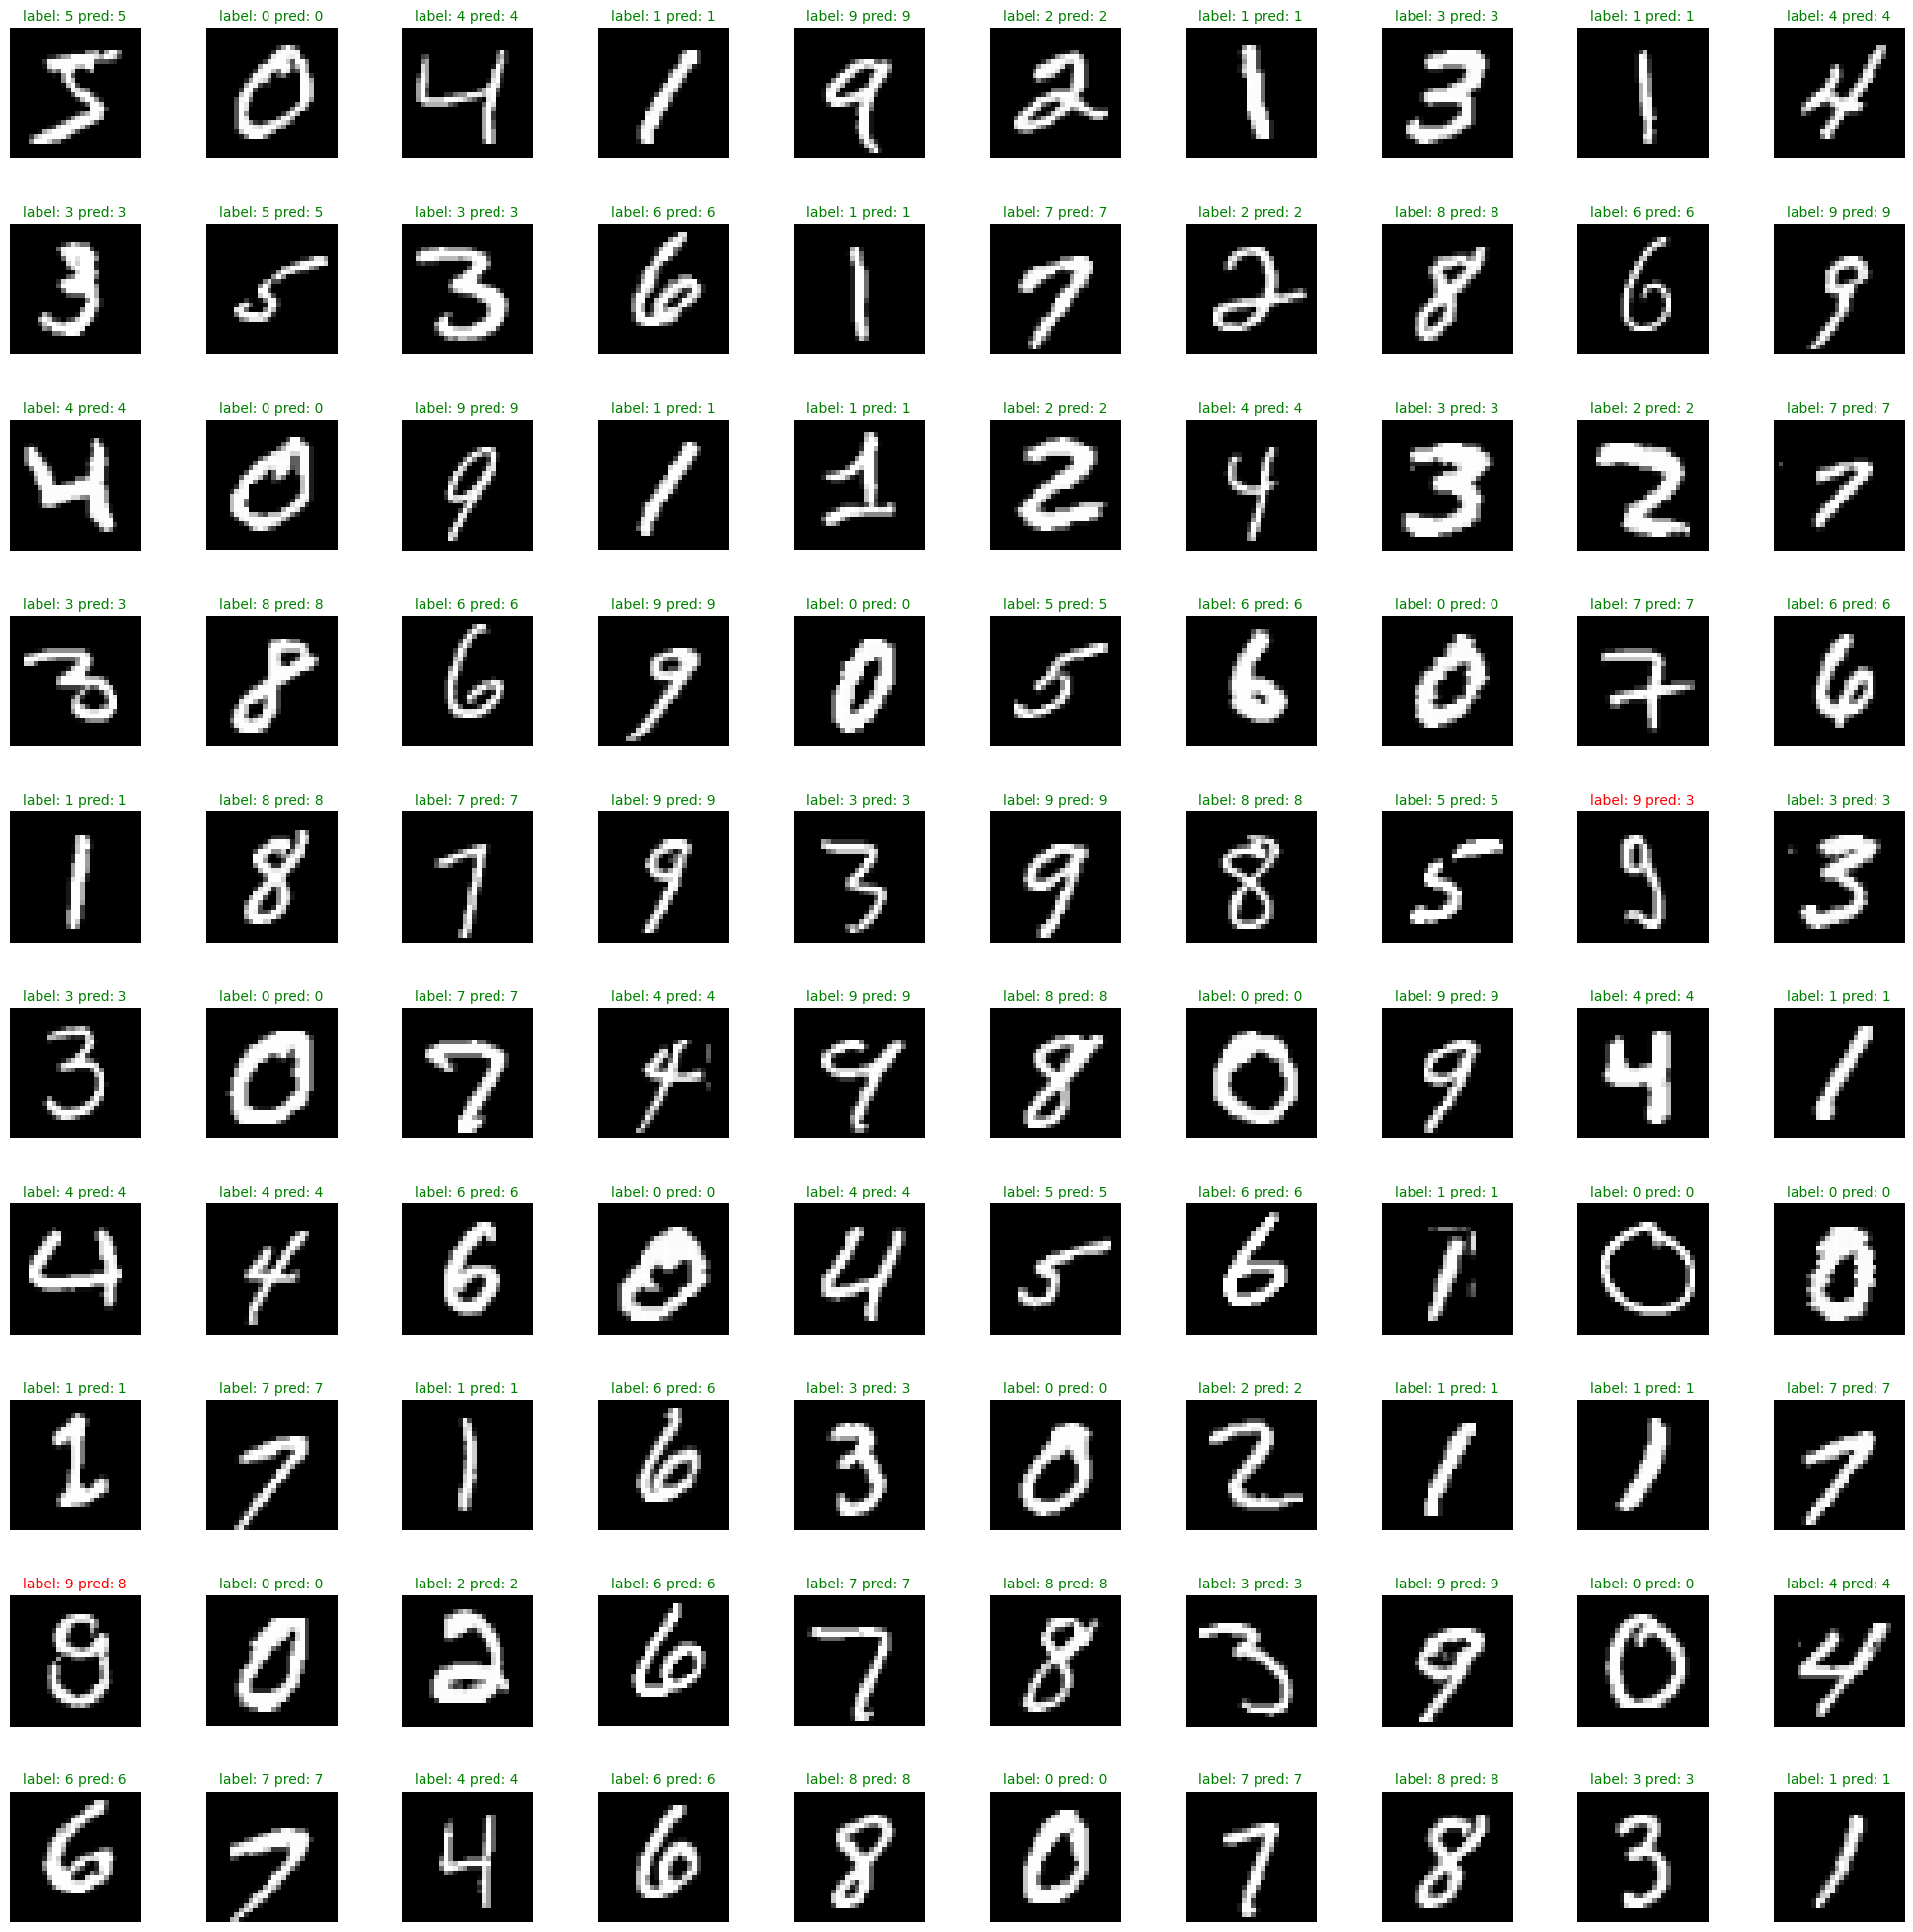

In [19]:
create_prediction_grid(model, training_data, 10, 10, device=device)

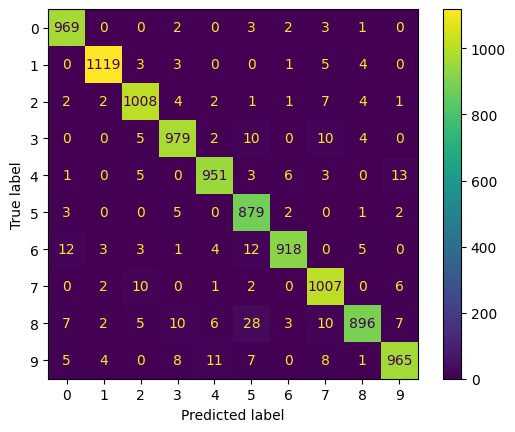

In [20]:
# Get all data
all_inputs = []
all_labels = []

for i in range(len(test_data)):
    x, y = test_data[i]
    all_inputs.append(x)
    all_labels.append(y)

# Stack input tensors
inputs_tensor = torch.stack(all_inputs)  # Shape: [N, ...]
labels_tensor = torch.tensor(all_labels)

# Send to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
inputs_tensor = inputs_tensor.to(device)

# Predict
model.eval()
with torch.no_grad():
    outputs = model(inputs_tensor)
    test_preds = outputs.argmax(dim=1).cpu()  # shape: [N]

# Get ground-truth
test_labels = labels_tensor.cpu()  # shape: [N]

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
